.

<div style="text-align: center; font-size: 35px; color: #4CAF50; margin-bottom: 20px;">FŐSZEREPBEN AZ ADAT - IMDb EDA</div>


.

<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">MIT JELENT AZ EDA?</div>

## Az Exploratory Data Analysis (EDA), vagyis feltáró adatelemzés egy olyan elemzési megközelítés, amely összefoglaló statisztikák és grafikus ábrázolások segítségével azonosítja az adatok általános mintáit, észleli az anomáliákat. Az EDA minden adatelemzés fontos első lépése.

<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">MILYEN ADATBÁZIST ELEMEZTEM?</div>

## https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset

## OSZLOPOK MEGNEVEZÉSE
- ### names: a film neve
- ### date_x: megjelenés dátuma 
- ### score: felhasználói értékelés 
- ### genre: műfaj
- ### overview: áttekintés
- ### crew: szereplők és stábtagok (1.:főszereplő, 2.:karakter neve, 3.:mellékszereplők)
- ### orig_title: a film eredeti címe
- ### status: gyártás állapota
- ### orig_lang: eredetileg ezen a nyelven jelent meg
- ### budget_x: a film költségvetése
- ### revenue: világszerte generált bevétel
- ### country: származási ország

<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">CSOMAGOK IMPORTÁLÁSA, FÜGGVÉNYEK</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #adatvizualizációs könyvtár
import datetime as dt

def hhead(df, n=2):
    print(df.shape)
    return df.head(n)

def NaN_values(df):
    return pd.DataFrame({
        'NaN values': df.isna().sum(),
        'Ratio of NaN values': (df.isna().sum() / df.shape[0])})

pd.set_option('display.max_rows', None)

<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">ADATHALMAZ BEOLVASÁSA</div>

In [2]:
# a .csv file beolvasása

movies = pd.read_csv('imdb_movies.csv')

<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">INFORMÁCIÓ AZ ADATOKRÓL</div>

## A táblázat első két sorának megtekintése

In [3]:
hhead(movies)

(10178, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU


## Az oszlopok típusainak és a nem null értékek lekérése

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


## Összefoglaló statisztikák - az oszlop típusának megfelelő kimutatások

In [5]:
movies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
names,10178,9660,Pinocchio,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_x,10178,5688,04/07/2023,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,10178,NaN,NaN,NaN,63.4971,13.537,0,59,65,71,100
genre,10093,2303,Drama,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,10178,9905,We don't have an overview translated in Englis...,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crew,10122,9927,"Donald Pleasence, Dr. Sam Loomis, Jamie Lee Cu...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orig_title,10178,9736,Pinocchio,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,10178,3,Released,10131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orig_lang,10178,54,English,7417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget_x,10178,NaN,NaN,NaN,6.48824e+07,5.70756e+07,1,1.5e+07,5e+07,1.05e+08,4.6e+08


<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">ADATTÍSZTÍTÁS</div>

##  A NaN értékek aránya és kezelése


In [6]:
NaN_values(movies)

,NaN values,Ratio of NaN values
names,0,0.000000
date_x,0,0.000000
score,0,0.000000
genre,85,0.008351
overview,0,0.000000
crew,56,0.005502
orig_title,0,0.000000
status,0,0.000000
orig_lang,0,0.000000
budget_x,0,0.000000


In [7]:
# NaN értékek kezelése:
# mivel jelentéktelen a NaN értékek aránya, ezért törlöm az érintett sorokat az érintett oszlopokban, 
# utána ellenőrzés

movies.dropna(subset=['genre', 'crew'], inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.isna().sum()
movies.shape

(10052, 12)

## A nulla értéket tartalmazó adatok vizsgálata

In [8]:
# a számokat tartalmazó oszlopok nulla értékeinek vizsgálata. 
# mivel jelen esetben a nulla értékek torzíthatják az elemzést, kezelni kell őket.

zero_budget_count = (movies['budget_x'] == 0.0).sum()
zero_revenue_count = (movies['revenue'] == 0.0).sum()
zero_score_count = (movies['score'] == 0.0).sum()

print(f'A "budget_x" oszlopban {zero_budget_count} darab nulla érték található.')
print(f'A "revenue" oszlopban {zero_revenue_count} darab nulla érték található.')
print(f'A "score" oszlopban {zero_score_count} darab nulla érték található.')

A "budget_x" oszlopban 0 darab nulla érték található.
A "revenue" oszlopban 73 darab nulla érték található.
A "score" oszlopban 163 darab nulla érték található.


In [9]:
# a 'revenue' oszlop nullás értékeinek áttekintése
zero_revenue_rows = movies[movies['revenue'] == 0.0]
zero_revenue_rows

# a 'score' oszlop nullás értékeinek áttekintése
zero_score_rows = movies[movies['score'] == 0.0]
#zero_score_rows

# mivel nem találtam az adatok feltöltéséhez megbízható információt, 
# kiszűrtem a nullás sorokat és felülírtam az eredeti DataFrame-t
movies = movies[(movies['revenue'] != 0.0) & (movies['score'] != 0.0)]

# ellenőrzöm a változást
hhead(movies)

(9817, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU


## Duplikációk vizsgálata

In [10]:
# nincs
movies.duplicated().sum()

0

## Adattípusok lekérése, átalakítása, oszlop formázások, új oszlopok létrehozása

In [11]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817 entries, 0 to 10051
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       9817 non-null   object 
 1   date_x      9817 non-null   object 
 2   score       9817 non-null   float64
 3   genre       9817 non-null   object 
 4   overview    9817 non-null   object 
 5   crew        9817 non-null   object 
 6   orig_title  9817 non-null   object 
 7   status      9817 non-null   object 
 8   orig_lang   9817 non-null   object 
 9   budget_x    9817 non-null   float64
 10  revenue     9817 non-null   float64
 11  country     9817 non-null   object 
dtypes: float64(3), object(9)
memory usage: 997.0+ KB


In [12]:
hhead(movies)

(9817, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU


## A 'date_x' oszlop

In [13]:
# a dátum oszlop dátum típusúvá alakítása 
movies['date_x'] = pd.to_datetime(movies['date_x'])

# új oszlop létrehozása, ami csak az éveket tartalmazza
movies['release_year'] = movies['date_x'].dt.year

# ellenőrzés
#print(movies[['date_x', 'release_year' ]])
#print(movies['date_x'].dtype)
#print(movies['release_year'].dtype)

## A 'score' oszlop

In [14]:
# az oszlop típusát egész számra állítom
movies['score'] = movies['score'].astype(int)

## A 'genre' oszlop

In [15]:
# a 'genre' oszlop-ból kivágom az első/elsődleges műfajt, és egy külön oszlopba elmentem
movies['primary_genre'] = movies['genre'].str.split(',').str[0]

# ellenőrzés
#print(movies[['genre', 'primary_genre']])

## A 'crew' oszlop

In [16]:
# a főszereplőket egy új oszlopba helyezem
movies['main_character'] = movies['crew'].str.split(', ', n=1).str[0]
       
# ellenőrzés
#print(movies['main_character'])
#movies.isna().sum()   

## A 'budget_x' és 'revenue' oszlopok

In [17]:
# a 'budget_x', 'revenue' oszlopok átalakítása /USD-ről /millió USD-ra 
movies[['budget_x', 'revenue']] = movies[['budget_x','revenue']] / 10**6 

# kerekítés
movies['budget_x'] = movies['budget_x'].round(2)
movies['revenue'] = movies['revenue'].round(2)

hhead(movies)

(9817, 15)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,release_year,primary_genre,main_character
0,Creed III,2023-03-02,73,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75.0,271.62,AU,2023,Drama,Michael B. Jordan
1,Avatar: The Way of Water,2022-12-15,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460.0,2316.79,AU,2022,Science Fiction,Sam Worthington


## Új, számított oszlop - Profit - létrehozása

In [18]:
movies['profit_M'] = (movies['revenue'] - movies['budget_x'])
#movies.profit

## A felesleges oszlopok eldobása

In [19]:
movies = movies.drop(['date_x', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang'], axis=1)

In [20]:

hhead(movies)

(9817, 9)


,names,score,budget_x,revenue,country,release_year,primary_genre,main_character,profit_M
0,Creed III,73,75.0,271.62,AU,2023,Drama,Michael B. Jordan,196.62
1,Avatar: The Way of Water,78,460.0,2316.79,AU,2022,Science Fiction,Sam Worthington,1856.79


## Oszlopok átnevezése

In [21]:
movies.rename(columns={ 'budget_x' : 'budget_M',
                        'revenue'  : 'revenue_M'}, inplace=True)        

In [22]:
hhead(movies)

(9817, 9)


,names,score,budget_M,revenue_M,country,release_year,primary_genre,main_character,profit_M
0,Creed III,73,75.0,271.62,AU,2023,Drama,Michael B. Jordan,196.62
1,Avatar: The Way of Water,78,460.0,2316.79,AU,2022,Science Fiction,Sam Worthington,1856.79


## Az oszlopok sorrendjének átalakítása

In [23]:
new_column_order = ['names', 'score', 'primary_genre', 'main_character',
                    'release_year', 'revenue_M', 'budget_M', 'profit_M', 'country']

movies = movies[new_column_order]

In [24]:
hhead(movies)

(9817, 9)


,names,score,primary_genre,main_character,release_year,revenue_M,budget_M,profit_M,country
0,Creed III,73,Drama,Michael B. Jordan,2023,271.62,75.0,196.62,AU
1,Avatar: The Way of Water,78,Science Fiction,Sam Worthington,2022,2316.79,460.0,1856.79,AU


## Ellenőrzés

In [25]:
hhead(movies)
#movies
#movies.describe(include='all').T
#movies.shape
movies.info()


(9817, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817 entries, 0 to 10051
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   names           9817 non-null   object 
 1   score           9817 non-null   int64  
 2   primary_genre   9817 non-null   object 
 3   main_character  9817 non-null   object 
 4   release_year    9817 non-null   int64  
 5   revenue_M       9817 non-null   float64
 6   budget_M        9817 non-null   float64
 7   profit_M        9817 non-null   float64
 8   country         9817 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 767.0+ KB


In [26]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
score,9817.0,64.883264,9.897942,10.00,60.00,66.00,72.00,100.00
release_year,9817.0,2007.674646,15.297947,1903.00,2001.00,2012.00,2019.00,2023.00
revenue_M,9817.0,254.649400,278.620116,0.00,28.65,146.60,425.31,2923.71
budget_M,9817.0,62.294802,54.227875,0.00,14.00,49.20,102.00,460.00
profit_M,9817.0,192.354598,241.724674,-199.55,8.05,91.88,322.62,2686.71


<div style="text-align: center; font-size: 35px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">EXPLORATORY DATA ANALYSIS</div>


## A numerikus oszlopok eloszlásának vizsgálata

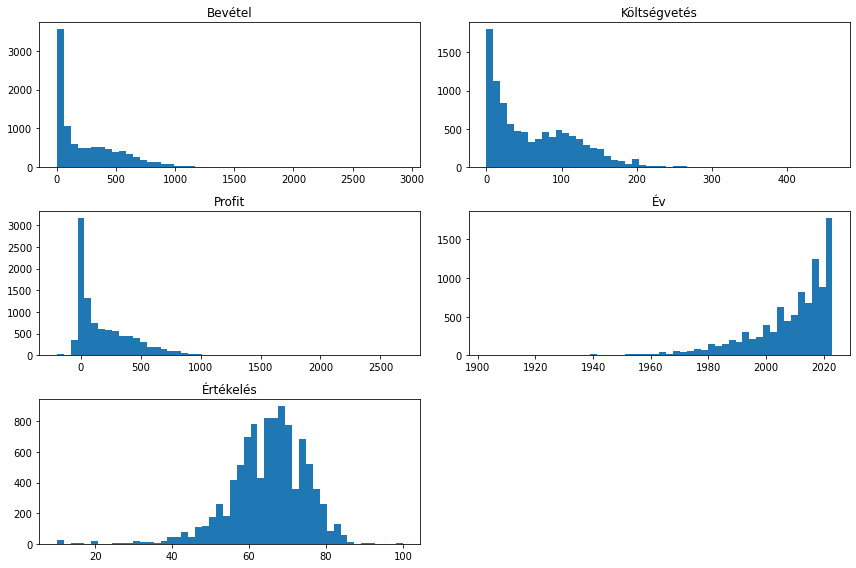

In [27]:
# az ábrák paraméterezése
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,8))
his1= movies['profit_M']
his2= movies['budget_M']
his3= movies['revenue_M']
his4= movies['release_year']
his5= movies['score']

axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Bevétel')
axes[0,1].hist(his2, bins=50)
axes[0,1].set_title('Költségvetés')
axes[1,0].hist(his1, bins=50)
axes[1,0].set_title('Profit')
axes[1,1].hist(his4, bins=50)
axes[1,1].set_title('Év')
axes[2,0].hist(his5, bins=50)
axes[2,0].set_title('Értékelés')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

## <span style="color:darkred; font-size:24px;">ÖSSZEGZÉS:</span> a 'Bevétel', 'Költségvetés' és 'Profit' eloszlásai mind jobbra torzultak: ami azt jelenti, hogy a filmek többsége alacsonyabb bevételt, költségvetést és jövedelmet generál, míg csak néhány film ér el magasabb értékeket ezen a téren. Az 'Év' balra ferde eloszlást követ, ami arra utal, hogy az újabb filmek adják a legnagyobb mennyiséget. A 'score' eloszlása közepesen széles, enyhe meredekséggel, tehát nincs jelentős mennyiségű kiugró érték


.

## A költségvetés, bevétel, profit és az értékelés oszlopok boxplot-jai

<AxesSubplot:xlabel='budget_M'>

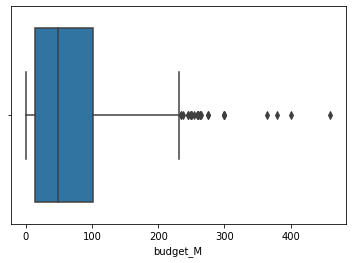

In [28]:
sns.boxplot(x=movies['budget_M'])

<AxesSubplot:xlabel='revenue_M'>

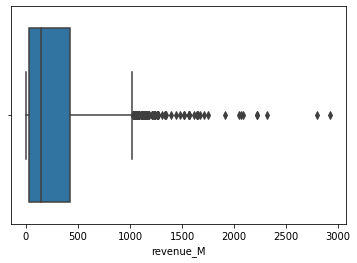

In [29]:
sns.boxplot(x=movies['revenue_M'])

<AxesSubplot:xlabel='profit_M'>

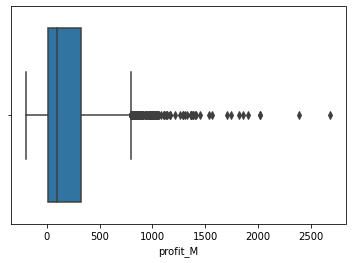

In [30]:
sns.boxplot(x=movies['profit_M'])

<AxesSubplot:xlabel='score'>

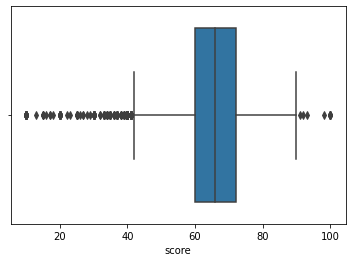

In [31]:
sns.boxplot(x=movies['score'])

## <span style="color:darkred; font-size:24px;">ÖSSZEGZÉS:</span> a dobozok minden esetben hosszúkásak, tehát az adatok eloszlása széles. Ez azt jelentheti, hogy számos különböző érték található a dataset-ben. Ahol a bal oldali bajusz rövidebb, ott az adatok alacsonyabb értékei közeli értékekkel rendelkeznek, és nincsenek jelentős alsó kiugrások. Ahol a jobb oldali bajusz hosszú, ott az adatok magasabb értékei  távolabb vannak az átlagtól, és van néhány magasabb kiugró érték. Az első három esetben a median a középhez viszonyítva balra helyezkedik el, ami azt mutatja, hogy a medián kisebb az átlagnál, és az adatok jobbra hajlanak. 


.

## A bevételek és a költségek elemzése

### A bevételek és költségek alakulása az idő függvényében

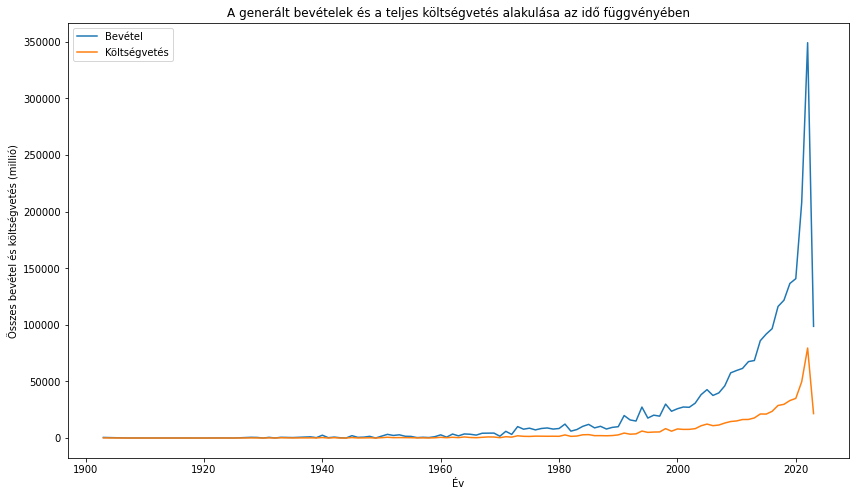

In [32]:
# diagram készítése
plt.figure(figsize=(14, 8))
plt.title('A generált bevételek és a teljes költségvetés alakulása az idő függvényében')

# évenként összegzett bevétel és költségvetés
plt.plot(movies.groupby('release_year')[['revenue_M', 'budget_M']].sum())
plt.xlabel('Év')
plt.ylabel('Összes bevétel és költségvetés (millió)')
plt.legend(['Bevétel','Költségvetés'], loc=2)
plt.show()

### A legnagyobb árbevételt elérő műfajok

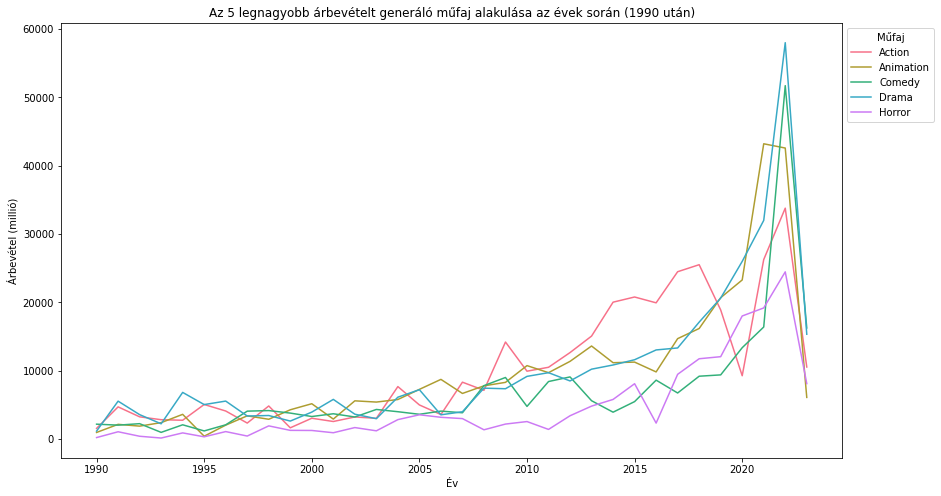

In [33]:
# adatok csoportosítása műfaj és évszám szerint, majd az árbevételek összegzése
genre_revenue = movies.groupby(['primary_genre', 'release_year'])['revenue_M'].sum().reset_index()

# csak az 1990 utáni éveket tartalmazó adatok kiválasztása
genre_revenue = genre_revenue[genre_revenue['release_year'] >= 1990]

# a legtöbb árbevételt generáló 5 műfaj kiválasztása az évek során
top_genres = genre_revenue.groupby('primary_genre')['revenue_M'].sum().nlargest(5).index

# csak a legtöbb árbevételt generáló műfajokat tartalmazó adatok kiválasztása
top_genre_data = genre_revenue[genre_revenue['primary_genre'].isin(top_genres)]

# eltérő színek beállítása
colors = sns.color_palette("husl", n_colors=len(top_genres))

# diagram készítése
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='revenue_M', hue='primary_genre', data=top_genre_data, palette=colors)
plt.title('Az 5 legnagyobb árbevételt generáló műfaj alakulása az évek során (1990 után)')
plt.xlabel('Év')
plt.ylabel('Árbevétel (millió)')
plt.legend(title='Műfaj', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### A legnagyobb költségvetésű műfajok

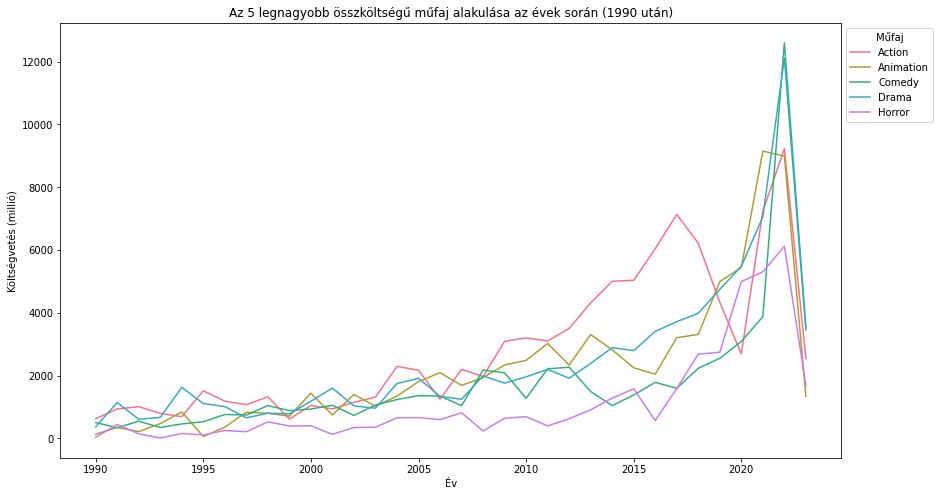

In [34]:
# adatok csoportosítása műfaj és évszám szerint, majd az összes költség összegzése
genre_budget = movies.groupby(['primary_genre', 'release_year'])['budget_M'].sum().reset_index()

# csak az 1990 utáni éveket tartalmazó adatok kiválasztása
genre_budget = genre_budget[genre_budget['release_year'] >= 1990]

# a legtöbb költséget generáló 5 műfaj kiválasztása az évek során
top_genres = genre_budget.groupby('primary_genre')['budget_M'].sum().nlargest(5).index

# csak a legtöbb költséget generáló műfajokat tartalmazó adatok kiválasztása
top_genre_data = genre_budget[genre_budget['primary_genre'].isin(top_genres)]

# eltérő színek beállítása
colors = sns.color_palette("husl", n_colors=len(top_genres))

# diagram készítése
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='budget_M', hue='primary_genre', data=top_genre_data, palette=colors)
plt.title('Az 5 legnagyobb összköltségű műfaj alakulása az évek során (1990 után)')
plt.xlabel('Év')
plt.ylabel('Költségvetés (millió)')
plt.legend(title='Műfaj', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### A legnagyobb profitot termelő műfajok

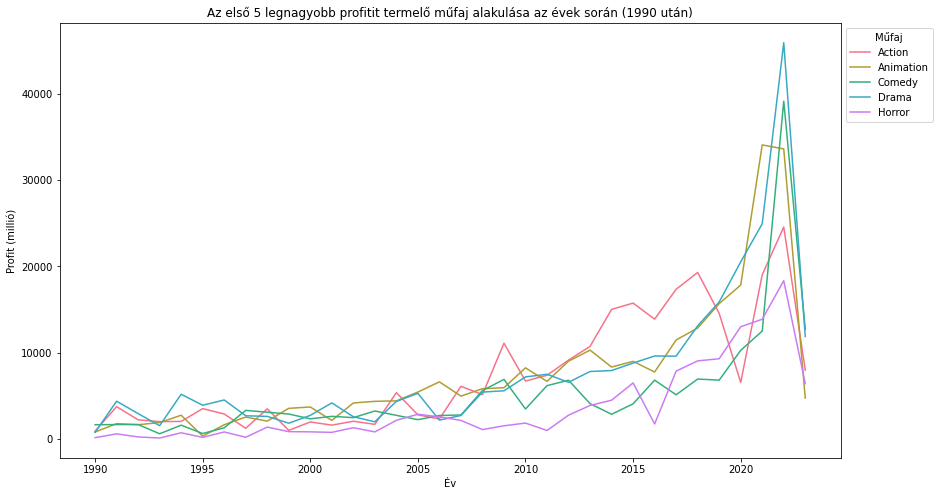

In [35]:
# adatok csoportosítása műfaj és évszám szerint, majd a profit összegzése
genre_profit = movies.groupby(['primary_genre', 'release_year'])['profit_M'].sum().reset_index()

# csak az 1990 utáni éveket tartalmazó adatok kiválasztása
genre_profit = genre_profit[genre_profit['release_year'] >= 1990]

# a legtöbb profitot termelő 5 műfaj kiválasztása az évek során
top_genres = genre_profit.groupby('primary_genre')['profit_M'].sum().nlargest(5).index

# csak a legtöbb profitot generáló műfajokat tartalmazó adatok kiválasztása
top_genre_data = genre_profit[genre_profit['primary_genre'].isin(top_genres)]

# eltérő színek beállítása
colors = sns.color_palette("husl", n_colors=len(top_genres))

# diagram készítése
plt.figure(figsize=(14, 8))
sns.lineplot(x='release_year', y='profit_M', hue='primary_genre', data=top_genre_data, palette=colors)
plt.title('Az első 5 legnagyobb profitit termelő műfaj alakulása az évek során (1990 után)')
plt.xlabel('Év')
plt.ylabel('Profit (millió)')
plt.legend(title='Műfaj', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Az évente gyártott filmek száma

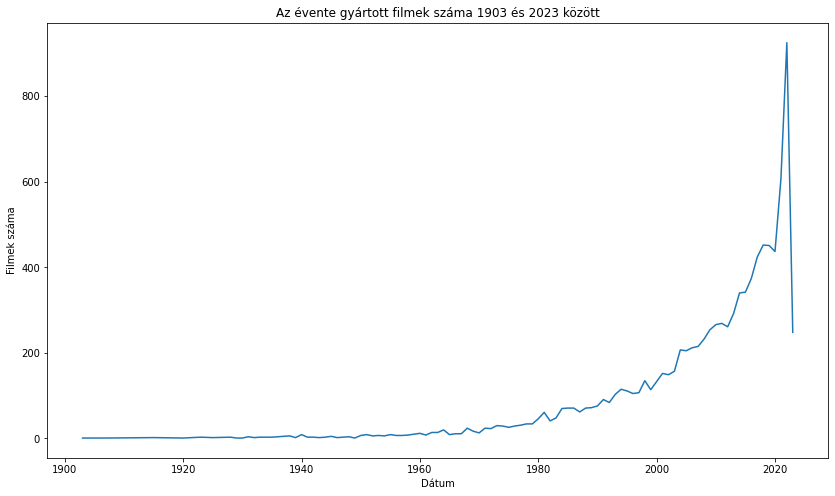

In [36]:
# diagram készítése
plt.figure(figsize=(14, 8))
plt.title('Az évente gyártott filmek száma 1903 és 2023 között')
plt.plot(movies['release_year'].value_counts().sort_index())
plt.xlabel('Dátum')
plt.ylabel('Filmek száma') 
plt.show()

### Az évente gyártott filmek műfajonkénti összesítése

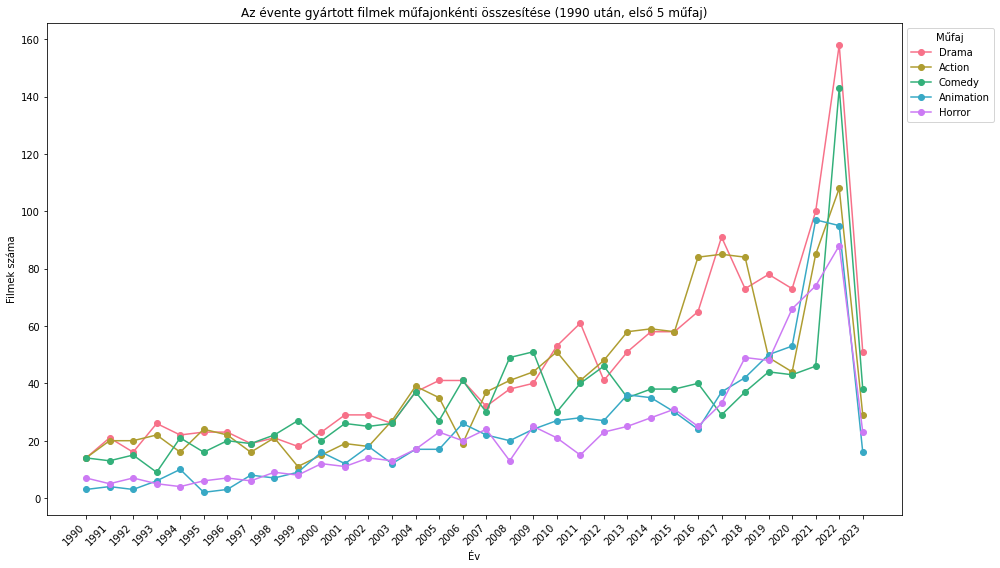

In [37]:
# szűrés
filtered_movies = movies[movies['release_year'] >= 1990]

# az első öt leggyakoribb műfaj 
top_genres = filtered_movies['primary_genre'].value_counts().nlargest(5).index
filtered_movies_top_genres = filtered_movies[filtered_movies['primary_genre'].isin(top_genres)]

# műfajokra szűrt évek száma
genre_counts_by_year = filtered_movies_top_genres.groupby(['release_year', 'primary_genre']).size().unstack()

# ábra 
plt.figure(figsize=(14, 8))
plt.title('Az évente gyártott filmek műfajonkénti összesítése (1990 után, első 5 műfaj)')
plt.xlabel('Év')
plt.ylabel('Filmek száma')

# minden műfaj színének előkészítése
colors = sns.color_palette("husl", n_colors=len(top_genres))

# minden műfajhoz külön vonaldiagram hozzáadása
for i, genre in enumerate(top_genres):
    plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], marker='o', label=genre, color=colors[i])

# jelmagyarázat  
plt.legend(title='Műfaj', loc='upper left', bbox_to_anchor=(1, 1))

# x tengely értékeinek beállítása
plt.xticks(genre_counts_by_year.index, rotation=45, ha='right')

# fix méretű ábra
plt.tight_layout()

plt.show()

### A költségvetés és a bevétel kapcsolata

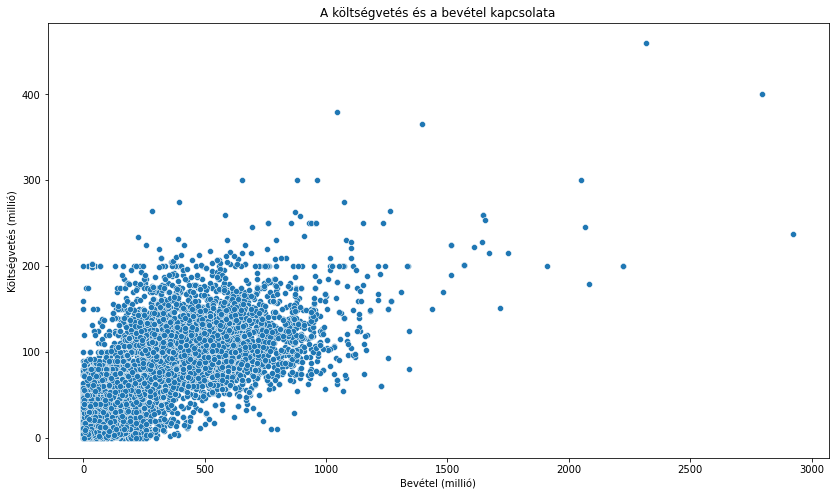

In [39]:
# scatter plot készítése
plt.figure(figsize=(14, 8))
sns.scatterplot(x='revenue_M', y='budget_M', data=movies)
plt.title('A költségvetés és a bevétel kapcsolata')
plt.xlabel('Bevétel (millió)')
plt.ylabel('Költségvetés (millió)')
plt.show()

## <span style="color:darkred; font-size:24px;">ÖSSZEGZÉS:</span> a bevételek a legtöbb esetben felülmúlták a költségvetést. Az 1990-es évek utáni bevételnövekedést elsősorban a következő műfajok generáltak: dráma, vígjáték animáció, akció és horror. Az 1990-es évektől az évente gyártott filmek száma is ugrásszerűen megnőtt. Az elmúlt három évtizedben a filmek költségvetése megkétszereződött, míg a filmek bevételei nagyobb arányban, kb. hatszorosára nőttek. A költségvetés és a bevételek közötti különbség nőtt, különösen az elmúlt öt évben. A szóródási diagram egyértelműen mutat egy mérsékelt pozitív korrelációt egy film költségvetése és bevételei között. 

.

## A profit elemzése

### Műfajok szerinti összprofit

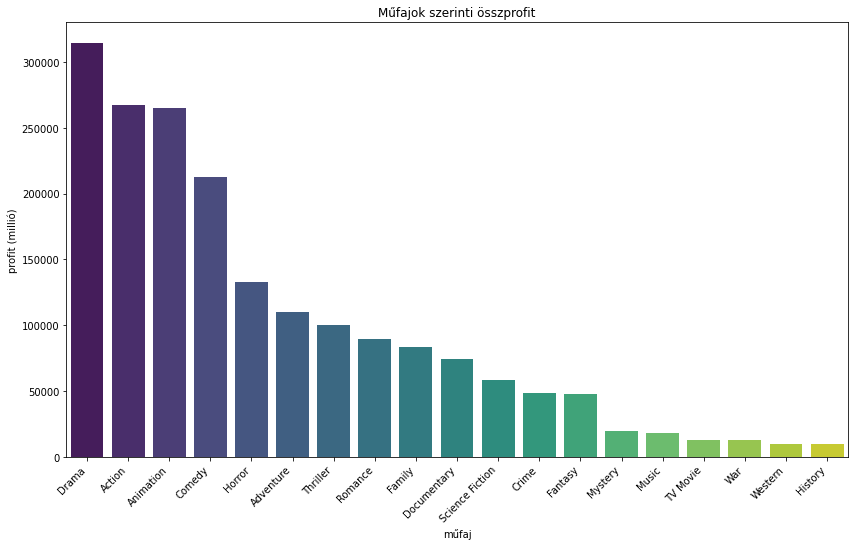

In [40]:
# az adatok csoportosítása műfaj szerint, majd a profitok összegzése
genre_profit_sum = movies.groupby('primary_genre')['profit_M'].sum().sort_values(ascending=False)

# oszlopdiagram készítése
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_profit_sum.index, y=genre_profit_sum.values, palette='viridis')
plt.title('Műfajok szerinti összprofit')
plt.ylabel('profit (millió)')
plt.xlabel('műfaj')
plt.xticks(rotation=45, ha='right')
plt.show()

### Profitabilitás

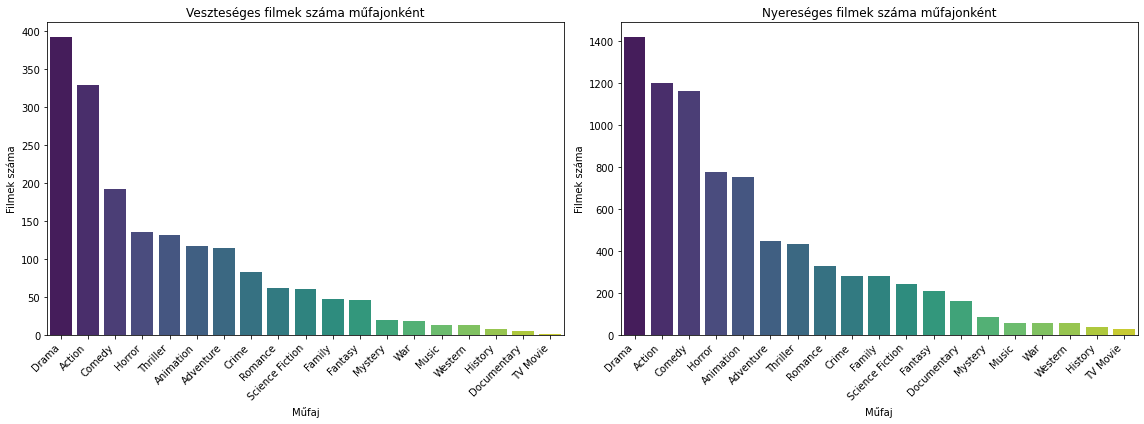

In [41]:
# a veszteséges filmek száma műfajonként
loss_movies = movies[movies['profit_M'] < 0]
loss_genre_counts = loss_movies['primary_genre'].value_counts()

# a nyereséges filmek száma műfajonként
profit_movies = movies[movies['profit_M'] >= 0]
profit_genre_counts = profit_movies['primary_genre'].value_counts()

# ábrák méretezése
plt.figure(figsize=(16, 6))

# veszteséges filmek 
plt.subplot(1, 2, 1)
sns.barplot(x=loss_genre_counts.index, y=loss_genre_counts.values, palette='viridis')
plt.title('Veszteséges filmek száma műfajonként')
plt.xlabel('Műfaj')
plt.ylabel('Filmek száma')
plt.xticks(rotation=45, ha='right')

# nyereséges filmek
plt.subplot(1, 2, 2)
sns.barplot(x=profit_genre_counts.index, y=profit_genre_counts.values, palette='viridis')
plt.title('Nyereséges filmek száma műfajonként')
plt.xlabel('Műfaj')
plt.ylabel('Filmek száma')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [42]:
total_loss_movies = movies[movies['profit_M'] < 0].shape[0]
print(f"Az összes veszteséges film száma: {total_loss_movies}")

total_profit_movies = movies[movies['profit_M'] >= 0].shape[0]
print(f"Az összes nyereséges film száma: {total_profit_movies}")

Az összes veszteséges film száma: 1793
Az összes nyereséges film száma: 8024


## <span style="color:darkred; font-size:24px;">ÖSSZEGZÉS:</span> a legjövedelmezőbb műfajok a dráma, akció, animáció, vígjáték. A legtöbb nyereséges és a legtöbb veszteséges film is ezekből a műfajokból származik. Ezek a műfajok szerepelnek a leggyakrabban az adatkészletben, mert költséghatékonyabb az előállításuk, ami könnyebben hozzáférhető teszi a filmesek számára. Következésképpen az alacsonyabb költségvetésű filmek általában nagyobb számot kapnak. A teljes adatkészlet 19%-át teszik ki a veszteséges filmek.

.

## Korrelációs hőtérkép

<AxesSubplot:title={'center':'Korreláció az értékelés, bevétel és a költségvetés között'}>

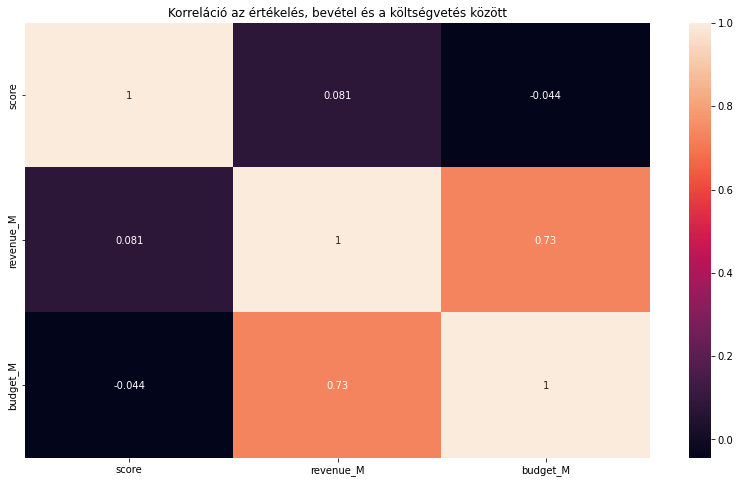

In [43]:
# hőtérkép paraméterezése
plt.figure(figsize=(14,8))
plt.title('Korreláció az értékelés, bevétel és a költségvetés között')
corr = movies[['score', 'revenue_M', 'budget_M']].corr()
sns.heatmap(corr, annot=True)

## <span style="color:darkred; font-size:24px;">ÖSSZEGZÉS:</span> itt azt látjuk, hogy csak a bevétel és költségvetés összefüggései mutatnak mérsékelt korrelációt. A fennmaradó összefüggések nem mutatnak szignifikáns összefüggést.

.

<div style="text-align: center; font-size: 33px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">ÉRDEKES KÉRDÉSEK</div>

### Melyik a leggyakoribb műfaj? A DRÁMA

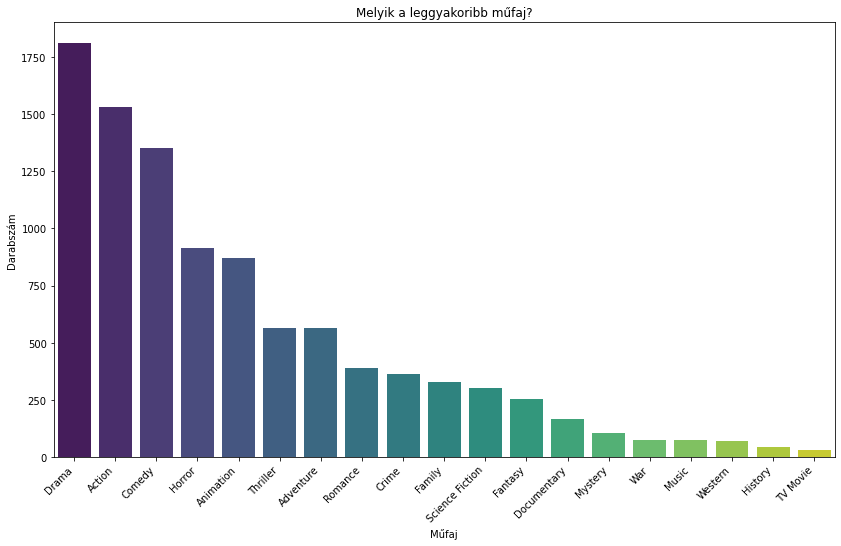

In [44]:
# a műfajok megszámlálása
genre_counts = movies['primary_genre'].value_counts()

#ábra
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Melyik a leggyakoribb műfaj?')
plt.xlabel('Műfaj')
plt.ylabel('Darabszám')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Melyik műfaj kapta a legtöbb felhasználói értékelést? A DRÁMA

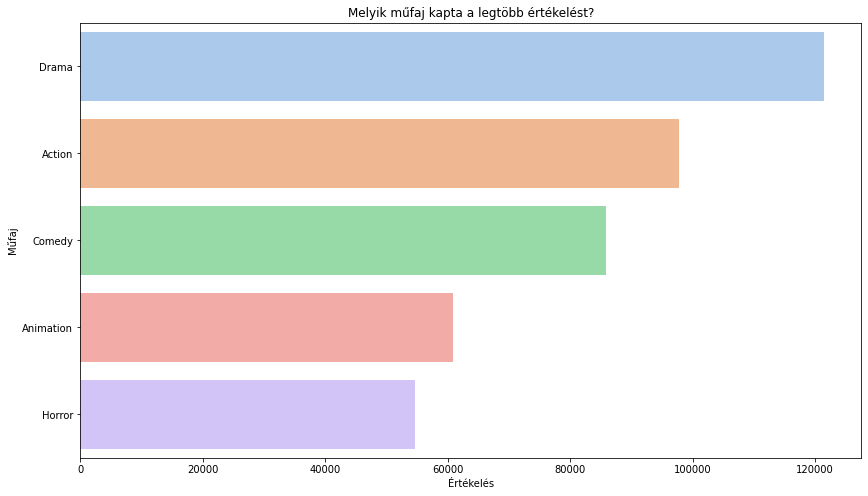

In [45]:
# műfajok csoportosítása, értékelések szerinti összesítés, első öt kiválasztása
genre_score = movies.groupby('primary_genre')['score'].sum().sort_values(ascending=False).head(5)

# ábra
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_score.values, y=genre_score.index, palette='pastel')
plt.title('Melyik műfaj kapta a legtöbb értékelést?')
plt.xlabel('Értékelés')
plt.ylabel('Műfaj')
plt.show()

### Mely filmek generáltak top bevételt? AVATAR,  AVENGERS: ENDGAME,  AVATAR: THE WAY OF WATER

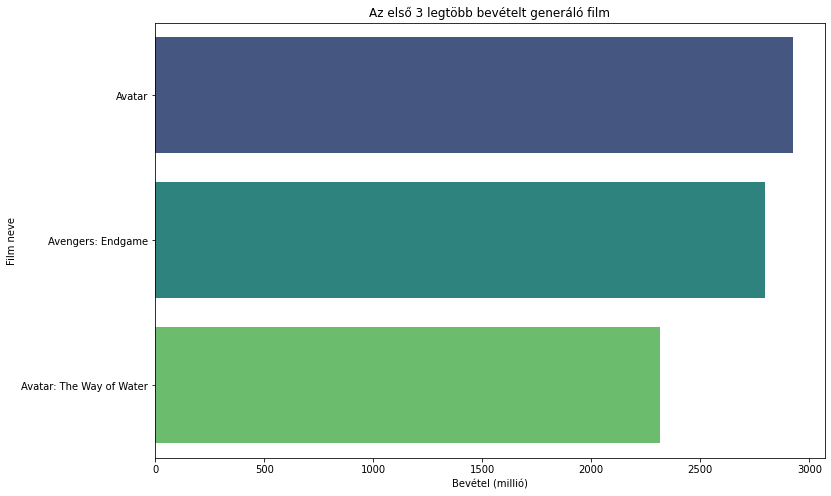

In [46]:
# sorbarendezés bevétel szerint, első három kiválasztása
top_films = movies.sort_values('revenue_M', ascending=False).head(3)

# ábra
plt.figure(figsize=(12, 8))
sns.barplot(x='revenue_M', y='names', data=top_films, palette='viridis')
plt.title('Az első 3 legtöbb bevételt generáló film')
plt.xlabel('Bevétel (millió)')
plt.ylabel('Film neve')
plt.show()

### Mely főszereplők generáltak top bevételt? FRANK WELKER, ROBERT DOWNEY JR., JACKIE CHAN

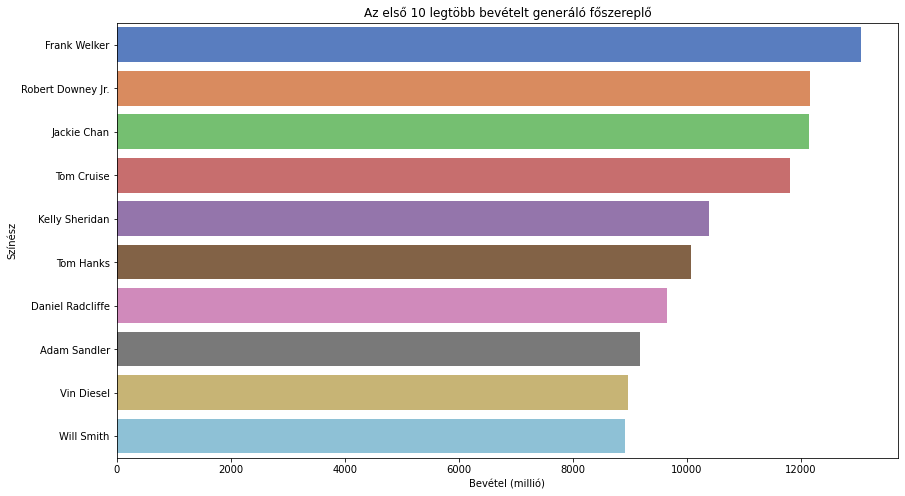

In [47]:
# csoportosítás főszereplők szerint, majd a bevételek összesítése, sorbarendezés
top_actors_revenue = movies.groupby('main_character')['revenue_M'].sum().sort_values(ascending=False).head(10)

# ábra
plt.figure(figsize=(14, 8))
sns.barplot(x=top_actors_revenue.values, y=top_actors_revenue.index, palette='muted')
plt.title('Az első 10 legtöbb bevételt generáló főszereplő')
plt.xlabel('Bevétel (millió)')
plt.ylabel('Színész')
plt.show()

.

.

<div style="text-align: center; font-size: 33px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">ÉRDEKESSÉG - EGY PÉLA AZ ADATHIBÁRA</div>

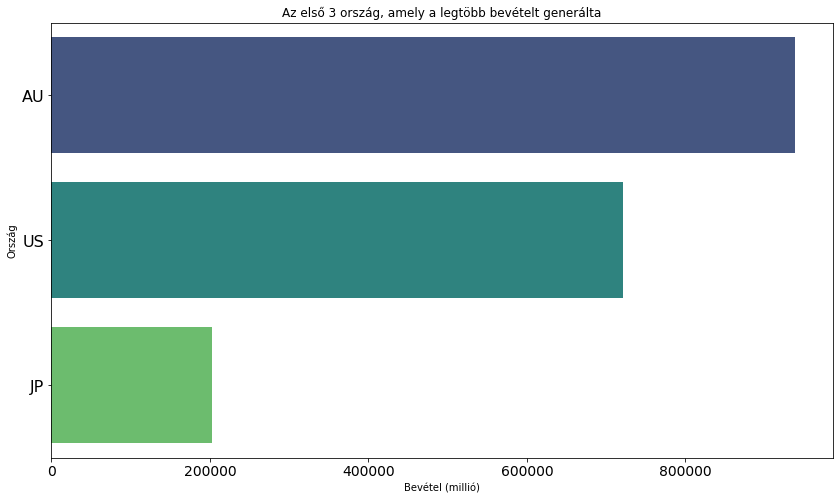

In [56]:
# az egyes országok összbevételeinek meghatározása, első három legnagyobb lekérése
revenue_by_country = movies.loc[:, ['country', 'revenue_M']]
revenue_by_country = revenue_by_country.groupby('country').sum()
top_3_countries = revenue_by_country.nlargest(3, 'revenue_M').reset_index()

# ábra
plt.figure(figsize=(14, 8))
sns.barplot(x='revenue_M', y='country', data=top_3_countries, palette='viridis')
plt.title('Az első 3 ország, amely a legtöbb bevételt generálta')
plt.xlabel('Bevétel (millió)')
plt.ylabel('Ország')
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.show()

.

<div style="text-align: center; font-size: 33px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">JAVASLATOK TOVÁBBI ELEMZÉSEKHEZ</div>

- ### A kaggle.com-on van több IMDb-s adattábla, ezek összekapcsolásával még összetettebb elemzéseket lehet készíteni,
- ### lehet plotnine csomaggal is vizualizációkat készíteni,
- ### lehet filmműfajok trendjeit azonosítani,
- ### lehet jövőbeli filmek sikerét előrejelezni
- ### vagy egyéb érdekes kérdésekre, összefüggésekre választ keresni...

.

.

<div style="text-align: center; font-size: 33px; background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px;">KÖSZÖNÖM A FIGYELMET!</div>

.